# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## Introducción

¡Claro, aquí tienes un resumen completo y claro sobre validación de modelos en Machine Learning! 🚀

---

**Resumen: Validación de modelos en Machine Learning**

---

### 1. **¿Qué es la validación de modelos?**

Es el proceso para evaluar qué tan bien un modelo generaliza a datos nuevos, no vistos durante el entrenamiento. Se busca medir su desempeño real y evitar **sobreajuste** (overfitting).

---

### 2. **Técnicas comunes de validación**

#### a) **Validación simple**

Dividir el dataset en entrenamiento y prueba (ej. 70%-30%).

#### b) **Validación cruzada (Cross-validation)**

Divide los datos en varias particiones (folds) y entrena/prueba iterativamente.

* Mejora la estimación del desempeño real.
* Usa todo el dataset para entrenamiento y prueba en distintas iteraciones.

---

### 3. **Clases y métodos clave en scikit-learn**

#### a) **Clases para particionar datos (`cv`)**

``cv`` significa **"cross-validation"** o **validación cruzada** en inglés.

* `KFold(n_splits=k)`
  Divide en k folds iguales, sin tener en cuenta clases.

* `StratifiedKFold(n_splits=k)`
  Divide en k folds manteniendo la proporción de clases. Ideal para clasificación con clases desbalanceadas.

* `LeaveOneOut()`
  Cada fold deja una muestra como prueba, el resto entrena. Exhaustivo pero costoso.

---

#### b) **Métodos para ejecutar validación**

* `cross_validate(modelo, X, y, cv=..., scoring=...)`
  Ejecuta la validación cruzada, devuelve métricas y tiempos para cada fold.

* `cross_val_score(modelo, X, y, cv=..., scoring=...)`
  Similar a `cross_validate` pero devuelve solo la métrica principal para cada fold.

---

### 4. **Parámetros importantes**

* **`cv`**: controla la forma en que se particiona el dataset (k folds, stratified, leave-one-out, etc).
* **`scoring`**: define qué métrica(s) evaluar (accuracy, precision, recall, f1, etc).
* **`n_splits`**: número de folds (cuando se usa KFold o StratifiedKFold).

---

### 5. **Ejemplo básico para crear y evaluar un modelo**

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

modelo = DecisionTreeClassifier(max_depth=10)
cv = StratifiedKFold(n_splits=5)
resultados = cross_validate(modelo, X, y, cv=cv, scoring='accuracy')

print("Precisión media:", resultados['test_score'].mean())
print("Desviación estándar:", resultados['test_score'].std())
```

---

### 6. **Interpretación de resultados**

* **`mean` (promedio):** desempeño promedio del modelo en las particiones.
* **`std` (desviación estándar):** mide la estabilidad del desempeño entre particiones.

  * Bajo std → modelo estable y resultados confiables.
  * Alto std → modelo inestable o resultados variables.
* **Intervalo de confianza (IC):** rango donde se espera que esté la métrica real con cierta confianza (ej. 95%).

  * IC estrecho → estimación precisa.
  * IC amplio → incertidumbre alta.

---

### 7. **¿Cuándo usar cada método de partición?**

| Método            | Cuándo usar                                                        | Ventajas                                      | Desventajas                      |
| ----------------- | ------------------------------------------------------------------ | --------------------------------------------- | -------------------------------- |
| `LeaveOneOut()`   | Datasets pequeños, quieres máxima exhaustividad                    | Usa casi todo para entrenar en cada iteración | Muy lento en datasets grandes    |
| `StratifiedKFold` | Clasificación con clases desbalanceadas, datasets medianos/grandes | Mantiene proporción de clases, rápido         | Menos exhaustivo que LeaveOneOut |

---

### 8. **Consejos finales**

* Siempre analiza **mean** y **std** juntos, no solo el promedio.
* Verifica que el método `cv` sea adecuado para tu tipo de problema (clasificación vs regresión).
* Usa varias métricas si es posible para tener una visión completa.
* Cuidado con datasets muy pequeños o muy grandes, adapta la validación para que sea eficiente y confiable.

---

Si quieres, te puedo ayudar con ejemplos concretos, gráficos, o código para tus propios datos. ¿Quieres?


## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [61]:
import pandas as pd

In [62]:
datos = pd.read_csv('prestacar.csv')

In [63]:
datos.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [64]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingresos_cliente    54025 non-null  float64
 1   anualidad_prestamo  54025 non-null  float64
 2   años_casa_propia    54025 non-null  float64
 3   telefono_trab       54025 non-null  int64  
 4   evaluacion_ciudad   54025 non-null  float64
 5   score_1             54025 non-null  float64
 6   score_2             54025 non-null  float64
 7   score_3             54025 non-null  float64
 8   score_social        54025 non-null  float64
 9   cambio_telefono     54025 non-null  float64
 10  moroso              54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [65]:
X = datos.drop(columns='moroso',axis=1)
y = datos.moroso

In [66]:
X.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0


In [67]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: moroso, dtype: int64

In [68]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [69]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [70]:
# este modelo de machine learning facilita la separacion de los datos de entrenamiento y Prueba
from sklearn.model_selection import train_test_split

In [71]:
y.value_counts().sort_index()

moroso
0    49309
1     4716
Name: count, dtype: int64

Separar por grupos de grandes a pequeños, primero separa entrenamiento-validacion de prueba y luego separa entrenamiento y validacion

In [72]:
# random_state nos permite replicar esta division en cualquier momento
# stratify deja la misma cantidad de observaciones para morosos en los 2 conjuntos de datos que estoy separando
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [73]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo en entrenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo en validacion es: {modelo.score(X_val,y_val)}')

La exactitud del modelo en entrenamiento es: 1.0
La exactitud del modelo en validacion es: 0.8488807595157216


In [74]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo en entrenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo en validacion es: {modelo.score(X_val,y_val)}')

La exactitud del modelo en entrenamiento es: 0.9205574912891986
La exactitud del modelo en validacion es: 0.9057573382109573


### Evaluando el modelo

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10358   121]
 [  961    41]]


In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

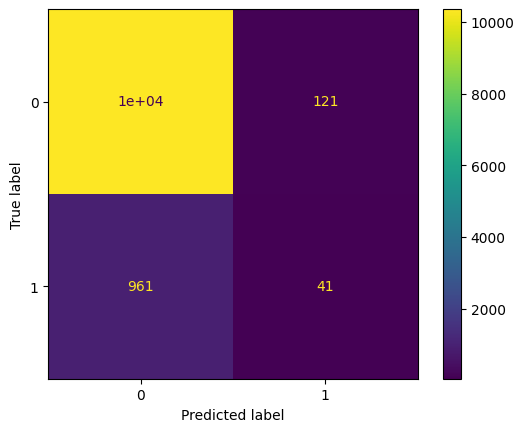

In [78]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

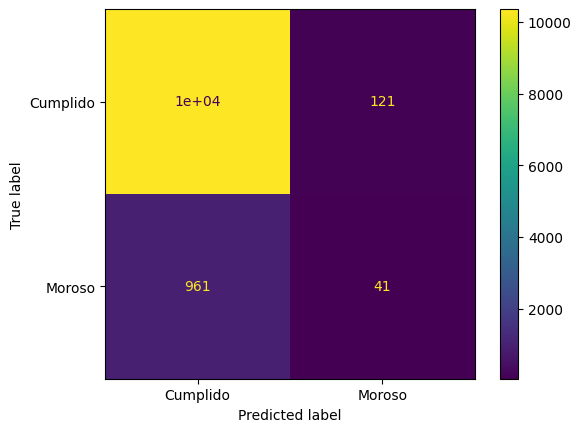

In [79]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [81]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La accuray del modelo es: {accuracy_score(y_val,y_previsto)}')
print(f'La recall del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La F1 del modelo es: {f1_score(y_val,y_previsto)}')

La precisión del modelo es: 0.25308641975308643
La accuray del modelo es: 0.9057573382109573
La recall del modelo es: 0.04091816367265469
La F1 del modelo es: 0.070446735395189


### Curva ROC

In [82]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [83]:
from sklearn.metrics import RocCurveDisplay

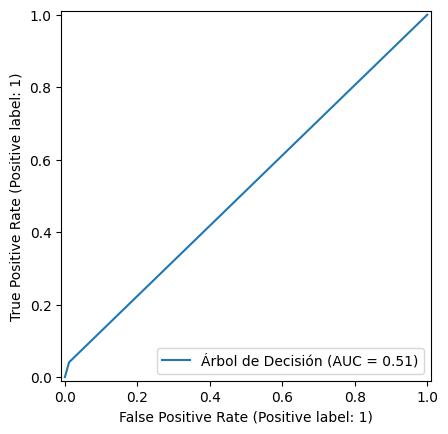

In [84]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión')

In [85]:
from sklearn.metrics import roc_auc_score

In [86]:
print(f'El area bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El area bajo la curva ROC es: 0.5146856301710921


### Curva de  precisión x sensibilidad

In [87]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [88]:
from sklearn.metrics import PrecisionRecallDisplay

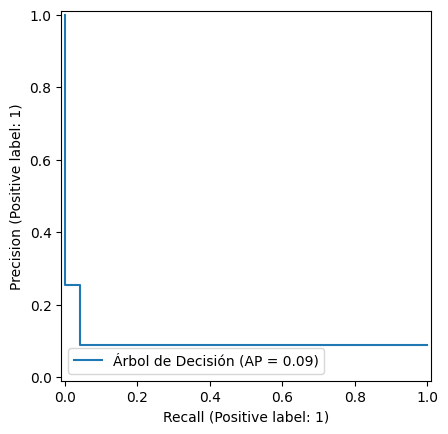

In [89]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión')

In [90]:
from sklearn.metrics import average_precision_score

In [91]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto)}')

El score promedio de precisión vs recall es: 0.0940593416939827


### Informe de métricas

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [94]:
from sklearn.model_selection import KFold, cross_validate

In [95]:
# n_splits=5 es el numero de iteraciones que se hara para validar y entrenar los datos
# shuffle=True es para revolver los datos al inicio

modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.29279733, 0.29051661, 0.42750406, 0.94757152, 0.67057252]),
 'score_time': array([0.01561594, 0.        , 0.01561475, 0.        , 0.01597953]),
 'test_score': array([0.91355471, 0.9084277 , 0.90755662, 0.91332753, 0.89928136])}

In [96]:
cv_resultados['test_score']

array([0.91355471, 0.9084277 , 0.90755662, 0.91332753, 0.89928136])

In [97]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es: {promedio}')
print(f'El desvio tipico es de: {desvio_std}')
print(f'El el intervalo de confianza es de : [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es: 0.9084295828678405
El desvio tipico es de: 0.005190545887760628
El el intervalo de confianza es de : [0.8980484910923192,0.9188106746433617]


### Validación cruzada con sensibilidad

In [98]:
def intervalo_confianza(resultados):
    promedio = resultados['test_score'].mean()
    desvio_std = resultados['test_score'].std()
    return print(f'El intervalo de confianza es de : [{promedio-2*desvio_std:.4f},{min(promedio+2*desvio_std,1):.4f}]')

In [99]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.82467461, 0.42449713, 0.50187159, 0.35507584, 0.35221481]),
 'score_time': array([0.0292902 , 0.        , 0.01562238, 0.01562166, 0.        ]),
 'test_score': array([0.02509908, 0.01732673, 0.0196802 , 0.0156658 , 0.02543353])}

In [100]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es de : [0.0127,0.0286]


### Estratificando los datos

In [101]:
datos['moroso'].value_counts()

moroso
0    49309
1     4716
Name: count, dtype: int64

In [102]:
from sklearn.model_selection import StratifiedKFold

In [103]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=skf,scoring='recall')

In [104]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es de : [0.0207,0.0357]


## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [107]:
y_balanceada.value_counts(normalize=True)

moroso
0    0.5
1    0.5
Name: proportion, dtype: float64

In [108]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')
cv_resultados['test_score'].mean()

np.float64(0.7232052813477913)

In [109]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es de : [0.6938,0.7526]


### Pipeline para validación

In [110]:
from imblearn.pipeline import Pipeline as imbpipeline

In [111]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

In [112]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [113]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es de : [0.2042,0.3306]


### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [114]:
from imblearn.under_sampling import NearMiss

In [115]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version=3)),('arbol',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [116]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es de : [0.6242,0.6983]


### Probando el modelo

In [118]:
undersample = NearMiss(version=3)
X_balanceada,y_balanceada = undersample.fit_resample(X,y)

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)